<a href="https://colab.research.google.com/github/OIEIEIO/supreme-octo-chainsaw/blob/main/Bankruptcy_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 12: Python Business Analytics

See the Repository for Future Work: https://github.com/firmai/python-business-analytics or


Sign up to the mailing list:
https://mailchi.mp/ec4942d52cc5/firmai

# Bankuptcy Prediction Ensemble Models

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

import warnings
warnings.filterwarnings('ignore')

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "../.."
CHAPTER_ID = "ensembles"

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id)

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    try:
        plt.savefig(path, format='png', dpi=300)
    except:
        plt.savefig(fig_id + ".png", format='png', dpi=300)

# Voting classifiers

In [2]:
heads_proba = 0.51
coin_tosses = (np.random.rand(10000, 10) < heads_proba).astype(np.int32)
cumulative_heads_ratio = np.cumsum(coin_tosses, axis=0) / np.arange(1, 10001).reshape(-1, 1)

Saving figure law_of_large_numbers_plot


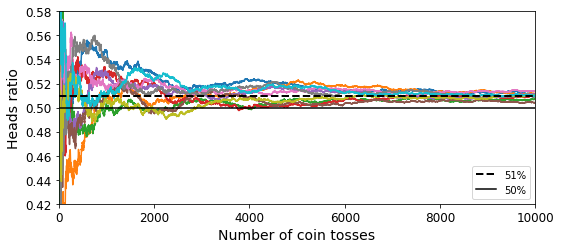

In [3]:
plt.figure(figsize=(8,3.5))
plt.plot(cumulative_heads_ratio)
plt.plot([0, 10000], [0.51, 0.51], "k--", linewidth=2, label="51%")
plt.plot([0, 10000], [0.5, 0.5], "k-", label="50%")
plt.xlabel("Number of coin tosses")
plt.ylabel("Heads ratio")
plt.legend(loc="lower right")
plt.axis([0, 10000, 0.42, 0.58])
save_fig("law_of_large_numbers_plot")
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(solver="liblinear", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
svm_clf = SVC(gamma="auto", random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

In [6]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(random_state=42,
                                                 solver='liblinear')),
                             ('rf',
                              RandomForestClassifier(n_estimators=10,
                                                     random_state=42)),
                             ('svc', SVC(gamma='auto', random_state=42))])

In [7]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.872
SVC 0.888
VotingClassifier 0.896


In [8]:
log_clf = LogisticRegression(solver="liblinear", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
svm_clf = SVC(gamma="auto", probability=True, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(random_state=42,
                                                 solver='liblinear')),
                             ('rf',
                              RandomForestClassifier(n_estimators=10,
                                                     random_state=42)),
                             ('svc',
                              SVC(gamma='auto', probability=True,
                                  random_state=42))],
                 voting='soft')

In [9]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.872
SVC 0.888
VotingClassifier 0.912


# Bagging ensembles

In [10]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.904


In [12]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.856


In [13]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

Saving figure decision_tree_without_and_with_bagging_plot


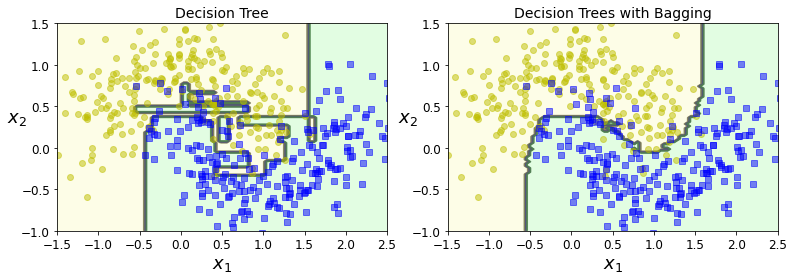

In [14]:
plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.subplot(122)
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Trees with Bagging", fontsize=14)
save_fig("decision_tree_without_and_with_bagging_plot")
plt.show()

# Random Forests

In [15]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter="random", max_leaf_nodes=16, random_state=42),
    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=42)

In [16]:
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [17]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

In [18]:
np.sum(y_pred == y_pred_rf) / len(y_pred)  # almost identical predictions

0.976

In [19]:
from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.11249225099876375
sepal width (cm) 0.02311928828251033
petal length (cm) 0.4410304643639577
petal width (cm) 0.4233579963547682


In [20]:
rnd_clf.feature_importances_

array([0.11249225, 0.02311929, 0.44103046, 0.423358  ])

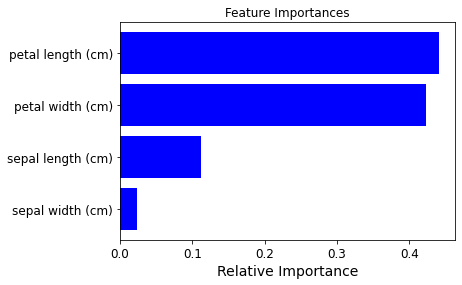

In [21]:
features = iris['feature_names']
importances = rnd_clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

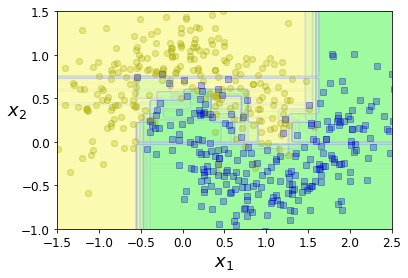

In [22]:
plt.figure(figsize=(6, 4))

for i in range(15):
    tree_clf = DecisionTreeClassifier(max_leaf_nodes=16, random_state=42 + i)
    indices_with_replacement = np.random.randint(0, len(X_train), len(X_train))
    tree_clf.fit(X[indices_with_replacement], y[indices_with_replacement])
    plot_decision_boundary(tree_clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.02, contour=False)

plt.show()

### Applying a Random Forest and XGBoost model to Bankruptcy

The following datasets have been set up so that we can predict a bankruptcy one (df_1) and two (df_2) years in advance. 

In [23]:
from pathlib import Path
import pandas as pd
import numpy as np

github_p = "https://raw.githubusercontent.com/Finance-781/FinML/master/Lecture%206%20-%20Ensembles/Inclass/"

my_file = Path("data/one_year.csv") # Defines path
if my_file.is_file():              # See if file exists
    print("Local file found")      
    df_1 = pd.read_csv("data/one_year.csv")
    df_2 = pd.read_csv("data/two_year.csv")
else:
    print("Be patient: loading from github (2 minutes)")
    df_1 = pd.read_csv(github_p+'data/one_year.csv')
    df_2 = pd.read_csv(github_p+'data/two_year.csv')
    print("Done")



Be patient: loading from github (2 minutes)
Done


In [24]:
## Lets put the files in a dictionary
df = {}
df[0] = df_1
df[1] = df_2

### Dealing With Imbalanced Data

Data Imbalance is a condition where the samples belonging to one or more 'majority' class labels of a labelled dataset heavily outnumber the sample belonging to the other 'minority' classes. It critically affects the modeling as the models won't have sufficient data belonging to minority classes to train on and this leads to biased models, ultimately leading to poor performance on test data.

In [25]:

def check_data_imbalance(dfs):
    for i in range(len(dfs)):
        print('Dataset: '+str(i+1)+'year')
        print(dfs[i].groupby('Y').size())
        minority_percent = (dfs[i]['Y'].tolist().count(1) / len(dfs[i]['Y'].tolist()))*100
        print('Minority (label 1) percentage: '+  str(minority_percent) + '%')
        print('-'*64)
        
check_data_imbalance(df)



Dataset: 1year
Y
0.0    6756
1.0     271
dtype: int64
Minority (label 1) percentage: 3.856553294435748%
----------------------------------------------------------------
Dataset: 2year
Y
0.0    9773
1.0     400
dtype: int64
Minority (label 1) percentage: 3.931976801336872%
----------------------------------------------------------------


#### Oversampling with SMOTE (Synthetic Minority Over Sampling Technique)

In [ ]:
from collections import OrderedDict
from imblearn.over_sampling import SMOTE 
from collections import Counter
from xgboost import XGBClassifier

def set_new_headers(dataframes):
    cols = ['X' + str(i+1) for i in range(len(dataframes[0].columns)-1)]
    cols.append('Y')
    for df in dataframes:
        df.columns = cols

# Split the features and labels into separate dataframes for all the original dataframes
def split_dataframes_features_labels(dfs):
    feature_dfs = [dfs[i].iloc[:,0:64] for i in range(len(dfs))]
    label_dfs = [dfs[i].iloc[:,64] for i in range(len(dfs))]
    return feature_dfs, label_dfs

# Performs the SMOTE oversampling fro given dataframes.
def oversample_data_SMOTE(dfs, verbose=False):
    smote = SMOTE(ratio='auto', random_state=42, k_neighbors=10)
    #Split the features and labels for each dataframe
    feature_dfs, label_dfs = split_dataframes_features_labels(dfs)
    resampled_feature_arrays = []
    resampled_label_arrays = []
    for i in range(len(dfs)):
        if verbose: print('Dataset: ' + str(i+1) + 'year:')
        if verbose: print('Original dataset shape {}'.format(Counter(label_dfs[i])))
        dfi_features_res, dfi_label_res = smote.fit_sample(feature_dfs[i], label_dfs[i])
        if verbose: print('Resampled dataset shape {}\n'.format(Counter(dfi_label_res)))
        # Append the resampled feature and label arrays of ith dataframe to their respective list of arrays    
        resampled_feature_arrays.append(dfi_features_res)
        resampled_label_arrays.append(dfi_label_res)        
    return resampled_feature_arrays, resampled_label_arrays

# Utility Function to convert the arrays of features and labels to pandas dataframes, and then join them.
# Also re-assign the columns headers.
def restructure_arrays_to_dataframes(feature_arrays, label_arrays):
    resampled_dfs = []
    for i in range(len(feature_arrays)):
        feature_df = pd.DataFrame(data=feature_arrays[i])
        label_df = pd.DataFrame(data=label_arrays[i])
        # Must set the column header for label_df, otherwise it wont join with feature_df, as columns overlap (with col names '0')
        label_df.columns=['Y'] 
        resampled_dfs.append(feature_df.join(label_df))
    # re-assign the column headers for features and labels    
    set_new_headers(resampled_dfs)    
    return resampled_dfs

# Perform SMOTE oversampling on all the imputed dataframes, and return them in a dictionary.
def perform_oversampling(dfs):

    smote_feature_arrays, smote_label_arrays = oversample_data_SMOTE(dfs, verbose=True)
    oversampled_dataframes = restructure_arrays_to_dataframes(smote_feature_arrays, smote_label_arrays)
    print('-'*100)
    return oversampled_dataframes

oversampled_df = perform_oversampling(df)

### Building Classification Model

#### Cross-Validation

In [ ]:
def prepare_kfold_cv_data(k, X, y, verbose=False):
    X = X.values
    y = y.values
    kf = KFold(n_splits=k, shuffle=False, random_state=42)
    X_train = []
    y_train = []
    X_test = []
    y_test = []
    
    for train_index, test_index in kf.split(X):
        X_train.append(X[train_index])
        y_train.append(y[train_index])
        X_test.append(X[test_index])
        y_test.append(y[test_index])
    return X_train, y_train, X_test, y_test

#### Random Forest Model

In [ ]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators = 5, criterion = 'entropy')

#### XGBoost Model

In [ ]:
# eXtreme Gradient Boosting Classifier (XGBClassifier)
xgb_classifier = XGBClassifier()

In [ ]:
# creating a dictionary of models
models_dictionary = OrderedDict()

models_dictionary['Random Forest'] = rf_classifier
models_dictionary['Extreme Gradient Boosting'] = xgb_classifier


#### Perform Data Modeling

In [ ]:
import numpy


In [ ]:
feature_dfs, label_dfs = split_dataframes_features_labels(oversampled_df) 

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score

def perform_data_modeling(_models_, _imputers_, verbose=False, k_folds=5):
    
    # 2 Models
    # 2 datasets (year_1, year_2)
    # 7 metrics, averaged over all the K-Folds
    model_results = OrderedDict()
    
    # Iterate over the models
    for model_name, clf in _models_.items():
        if verbose: print("-"*120, "\n", "Model: " + '\033[1m' + model_name + '\033[0m' + " Classifier")

        # call the split_dataframes_features_labels function to get a list of features and labels for all the dataframes
        feature_dfs, label_dfs = split_dataframes_features_labels(oversampled_df)            

        year_results = OrderedDict()

        # Iterate over dataframe_list individually
        for df_index in range(len(oversampled_df)):
            if verbose: print('\t\tDataset: ' + '\033[1m' + str(df_index+1) + 'year' + '\033[0m')

            # Calling the 'prepare_kfold_cv_data' returns lists of features and labels 
            # for train and test sets respectively.
            # The number of items in the list is equal to k_folds
            X_train_list, y_train_list, X_test_list, y_test_list = prepare_kfold_cv_data(k_folds, feature_dfs[df_index], label_dfs[df_index], verbose)

            metrics_results = OrderedDict()
            accuracy_list = np.zeros([k_folds])
            precision_list = np.zeros([k_folds,2])
            recall_list = np.zeros([k_folds,2])
            roc_au_list = np.zeros([k_folds,2])
            TN_list = np.zeros([k_folds])
            FP_list = np.zeros([k_folds])
            FN_list = np.zeros([k_folds])
            TP_list = np.zeros([k_folds])                

            # Iterate over all the k-folds
            for k_index in range(k_folds):
                X_train = X_train_list[k_index]
                y_train = y_train_list[k_index]
                X_test = X_test_list[k_index]
                y_test = y_test_list[k_index]


                # Fit the model and 
                clf = clf.fit(X_train, y_train)
                y_test_predicted = clf.predict(X_test)
                
                y_test_predicted_prob = clf.predict_proba(X_test)

                #code for calculating accuracy 
                _accuracy_ = accuracy_score(y_test, y_test_predicted, normalize=True)
                accuracy_list[k_index] = _accuracy_

                #code for calculating recall 
                _recalls_ = recall_score(y_test, y_test_predicted, average=None)
                recall_list[k_index] = _recalls_
                
                _roc_au_ = roc_auc_score(y_test, y_test_predicted)
                roc_au_list[k_index] = _roc_au_

                #code for calculating precision 
                _precisions_ = precision_score(y_test, y_test_predicted, average=None)
                precision_list[k_index] = _precisions_

                #code for calculating confusion matrix 
                _confusion_matrix_ = confusion_matrix(y_test, y_test_predicted)
                TN_list[k_index] = _confusion_matrix_[0][0]
                FP_list[k_index] = _confusion_matrix_[0][1]
                FN_list[k_index] = _confusion_matrix_[1][0]
                TP_list[k_index] = _confusion_matrix_[1][1]

            # creating a metrics dictionary
            metrics_results['Accuracy'] = np.mean(accuracy_list)
            metrics_results['Precisions'] = np.mean(precision_list, axis=0)
            metrics_results['Recalls'] = np.mean(recall_list, axis=0)
            metrics_results['ROC AUC'] = np.mean(roc_au_list, axis=0)
            metrics_results['TN'] = np.mean(TN_list)
            metrics_results['FP'] = np.mean(FP_list)
            metrics_results['FN'] = np.mean(FN_list)
            metrics_results['TP'] = np.mean(TP_list)

            if verbose:
                print('\t\t\tAccuracy:', metrics_results['Accuracy'])
                print('\t\t\tPrecision:', metrics_results['Precisions'])
                print('\t\t\tRecall:', metrics_results['Recalls'])
                print('\t\t\tRoc AUC:', metrics_results['ROC AUC'][0])

            year_results[str(df_index+1)+'year'] = metrics_results   
    
            
        model_results[model_name] = year_results  
        
    return model_results

In [ ]:
### Randomising Order
oversampled_df[0] = oversampled_df[0].sample(len(oversampled_df[0]))
oversampled_df[1] = oversampled_df[1].sample(len(oversampled_df[1]))

In [ ]:
### We would expect XGBoost to perform better, so some hyperperamater tuning might be necessary. 
results = perform_data_modeling(models_dictionary, oversampled_df, verbose=True, k_folds=5)

------------------------------------------------------------------------------------------------------------------------ 
 Model: Random Forest Classifier
		Dataset: 1year
			Accuracy: 0.9694341046615147
			Precision: [0.97554328 0.96343702]
			Recall: [0.96304489 0.97588902]
			Roc AUC: 0.9694669590932747
		Dataset: 2year
			Accuracy: 0.9618337772561059
			Precision: [0.96835929 0.95548048]
			Recall: [0.9548793  0.96877466]
			Roc AUC: 0.9618269791427349
------------------------------------------------------------------------------------------------------------------------ 
 Model: Extreme Gradient Boosting Classifier
		Dataset: 1year
			Accuracy: 0.9602569231818252
			Precision: [0.95507422 0.96557487]
			Recall: [0.9660027  0.95458992]
			Roc AUC: 0.960296310199578
		Dataset: 2year
			Accuracy: 0.9477133560888735
			Precision: [0.94128745 0.95431598]
			Recall: [0.95496429 0.94045467]
			Roc AUC: 0.9477094830044901


Credit: [Derek Snow](https://linkedin.com/company/firmai)